In [1]:
import numpy as np
import datetime
import sys
import glob
#import rams_tools
import os
import h5py
from collections import OrderedDict
import hdf5plugin
import copy
import pickle
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def grid_decomp(filein,ex_pts,grid_spacing):
    # Grab initial file at the beginning of the analysis period
    rams_file = h5py.File(filein, 'r')

    # Grab lat lon variables from case initial file
    lat = np.array(rams_file['GLAT'])
    lon = np.array(rams_file['GLON'])
    dom_rat = np.shape(lon)[0]/np.shape(lon)[1]

    # Calculate domain size
    ny = np.shape(lat)[0]
    nx = np.shape(lat)[1]

    # Calculate lat lon bounds 
    lat_avg = np.nanmean(lat,axis=1)
    lon_avg = np.nanmean(lon,axis=0)

    # Ignore 100 points near grid boundaries ((exclude 10 km near the boundaries))
    lat0 = lat_avg[ex_pts]
    lat1 = lat_avg[ny-ex_pts]

    lon0 = lon_avg[ex_pts]
    lon1 = lon_avg[nx-ex_pts]

    varns = ['UP','VP','RV','WP','THETA','temp','pres','RTC']
#    varns = []

    lon_arr = np.arange(lon0,lon1+0.1,grid_spacing)
    lat_arr =  np.arange(lat0,lat1+0.1,grid_spacing)

    return lon_avg,lat_avg,lon_arr,lat_arr,lon0,lat0,lon1,lat1,nx,ny


In [3]:
cases = ['RSA1.1-R','ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.1-RPR','BRA1.2-R','AUS1.1-R','DRC1.1-R','DRC1.1-RCN','DRC1.1-RCR','PHI1.1-R','PHI1.1-RPR','PHI2.1-R','WPO1.1-R','USA1.1-R']
savepathd = '/monsoon/pmarin/ENV/Doms/' # Savepath for saving domain images
savepathp = '/monsoon/pmarin/ENV/' # Savepath for saving profile fidata
savename = 'all_200'
gs_reanal = 0.25 # Degrees
ex_pts = 100 # exlcude # grid points near edges
ex_pts = 200 # exlcude # grid points near edges

prof = OrderedDict()
latlon = OrderedDict()
numg = OrderedDict()

profs = OrderedDict()
latlons_id = OrderedDict()
latlons = OrderedDict()
numgs = OrderedDict()

RSA1.1-R
ARG1.1-R_old
ARG1.2-R
BRA1.1-R
BRA1.1-RPR
BRA1.2-R
AUS1.1-R
DRC1.1-R
DRC1.1-RCN
DRC1.1-RCR
PHI1.1-R
PHI1.1-RPR
PHI2.1-R
WPO1.1-R
USA1.1-R


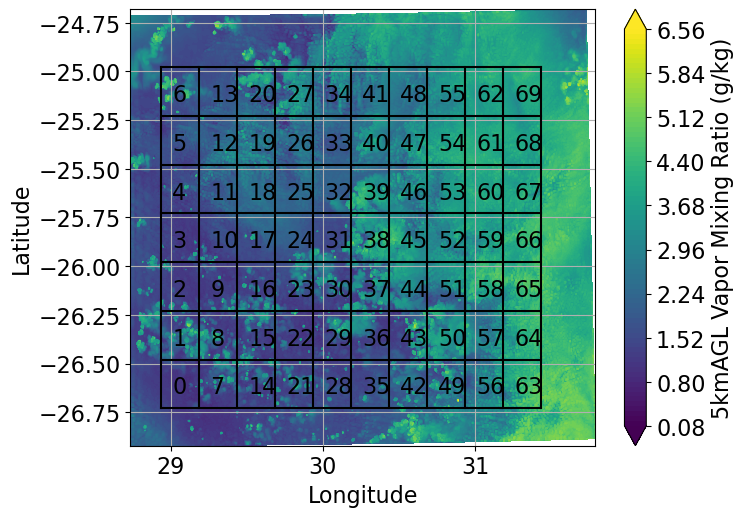

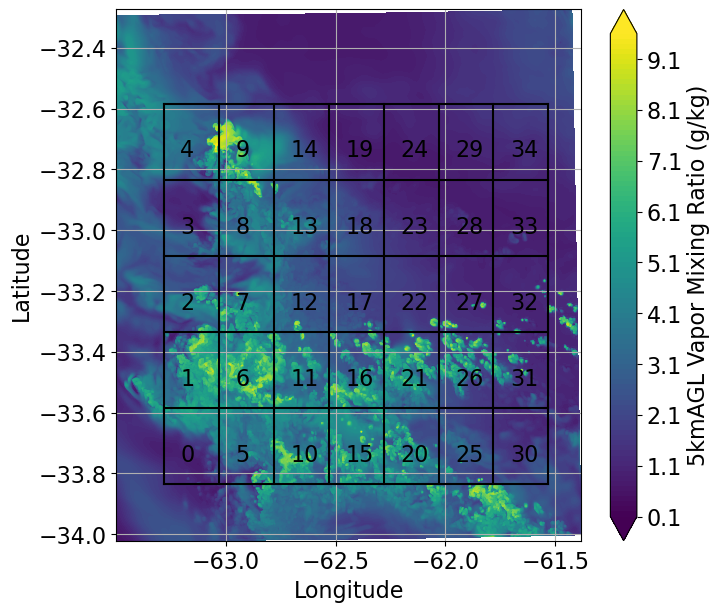

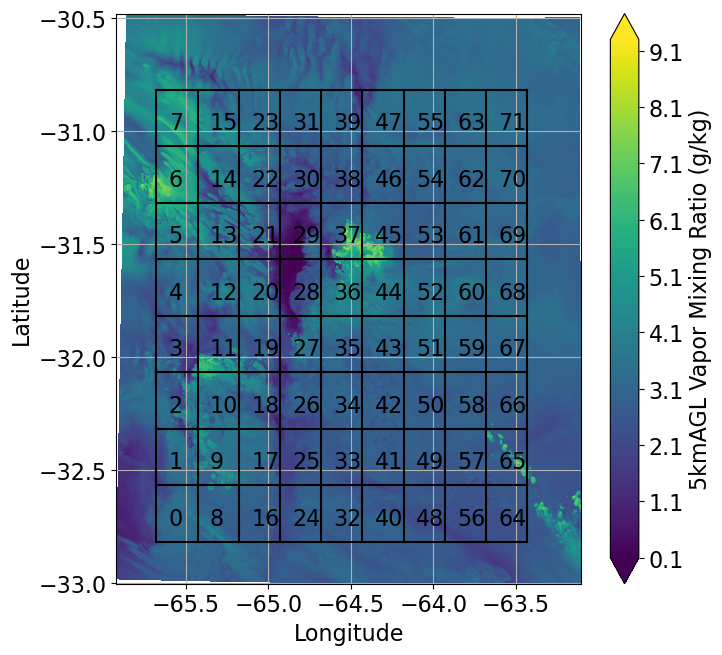

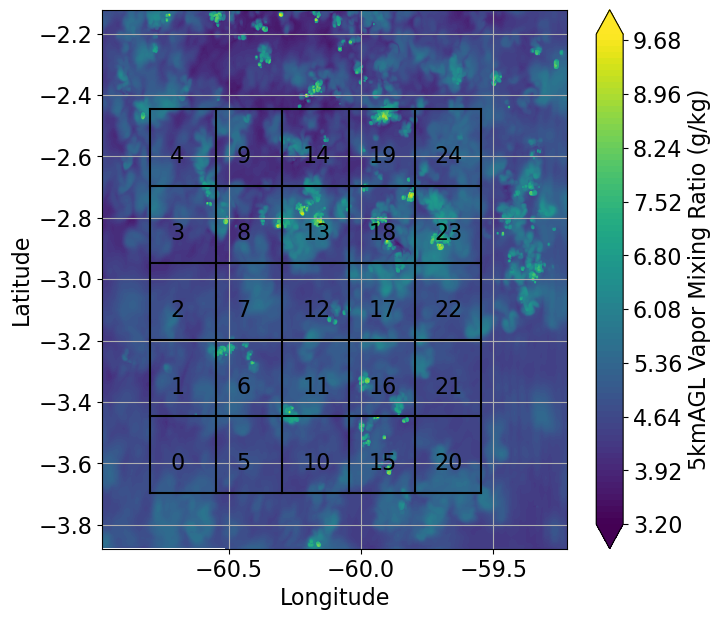

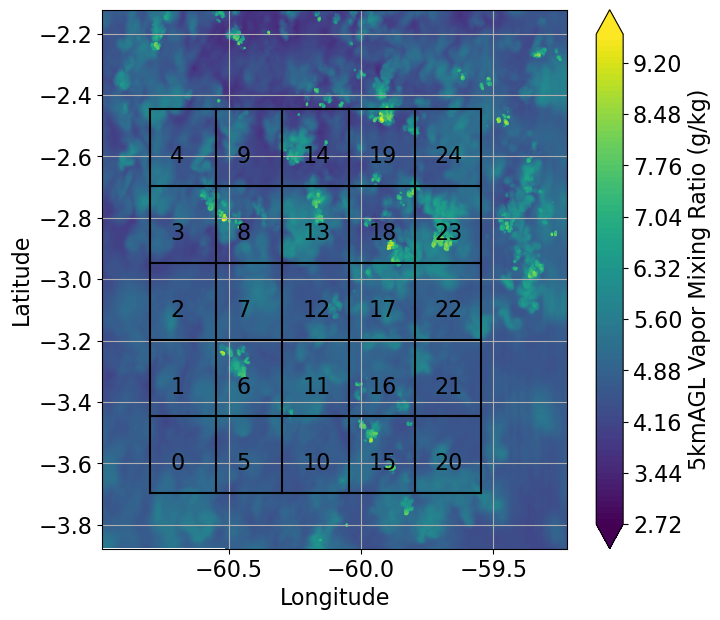

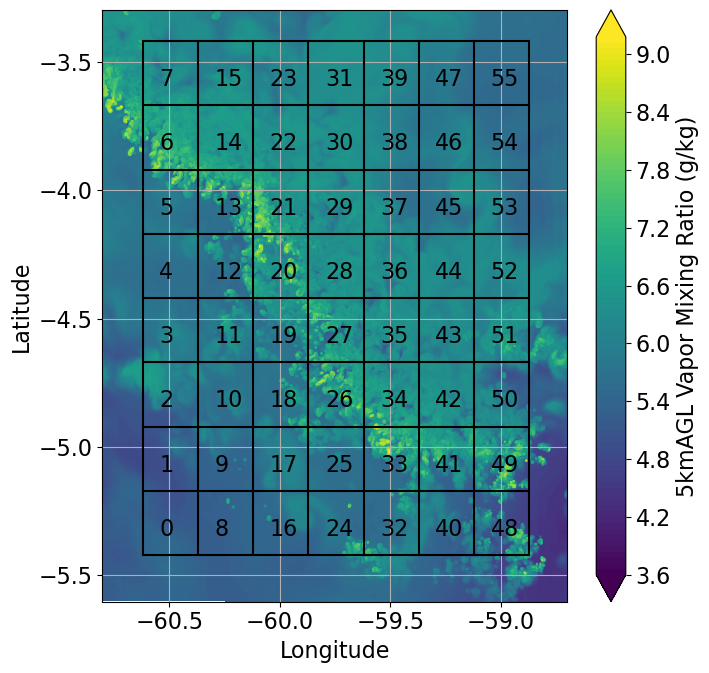

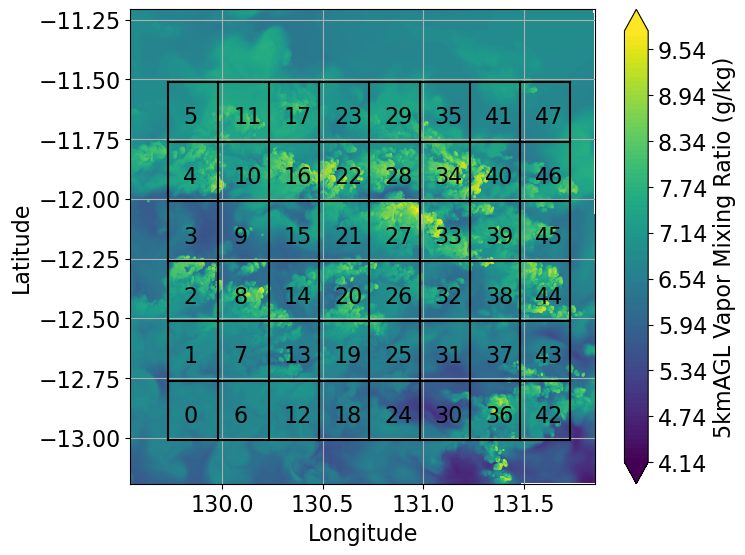

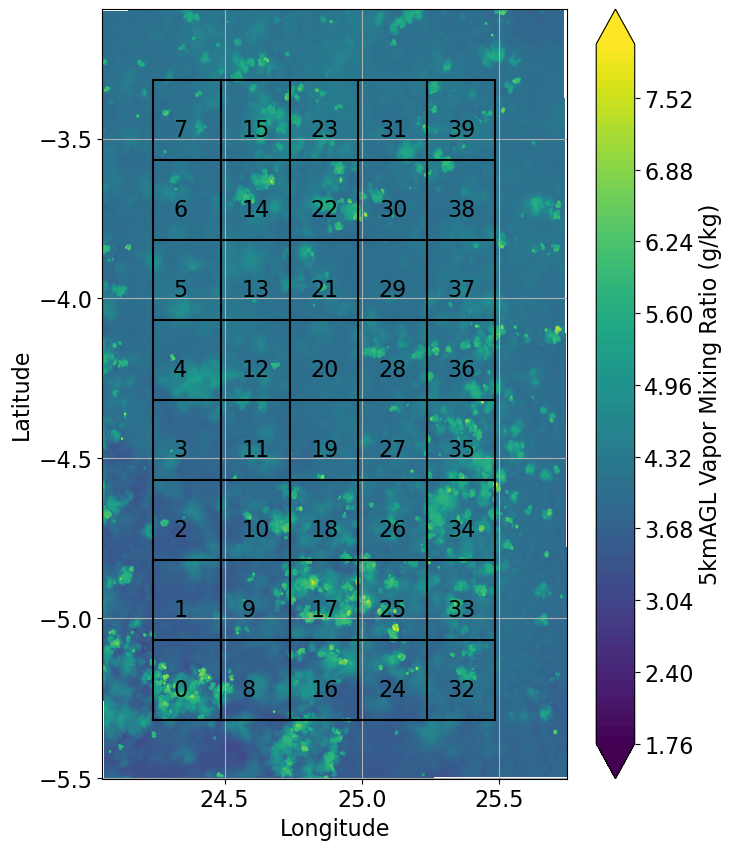

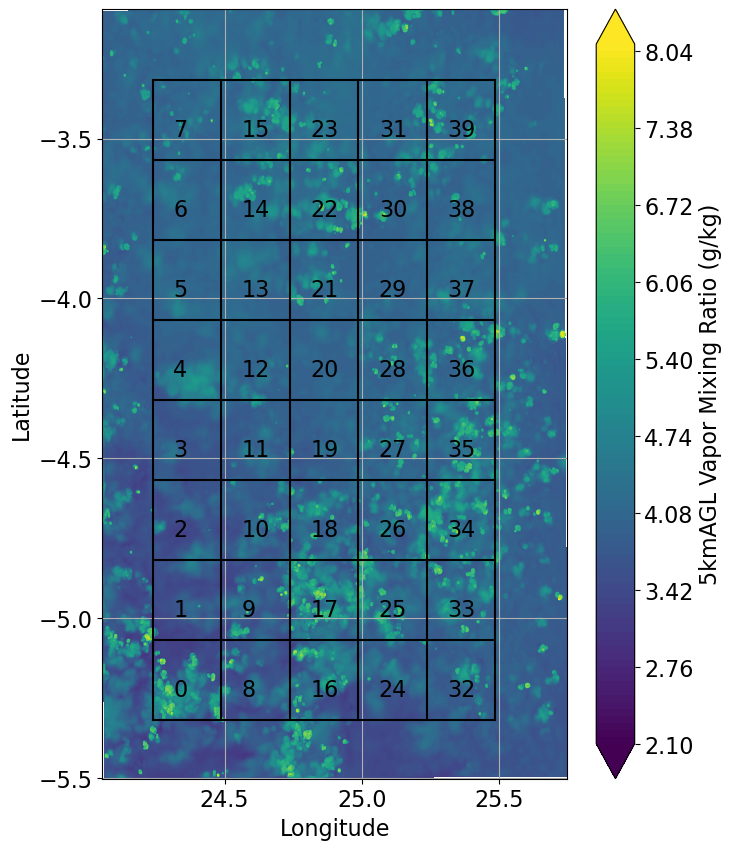

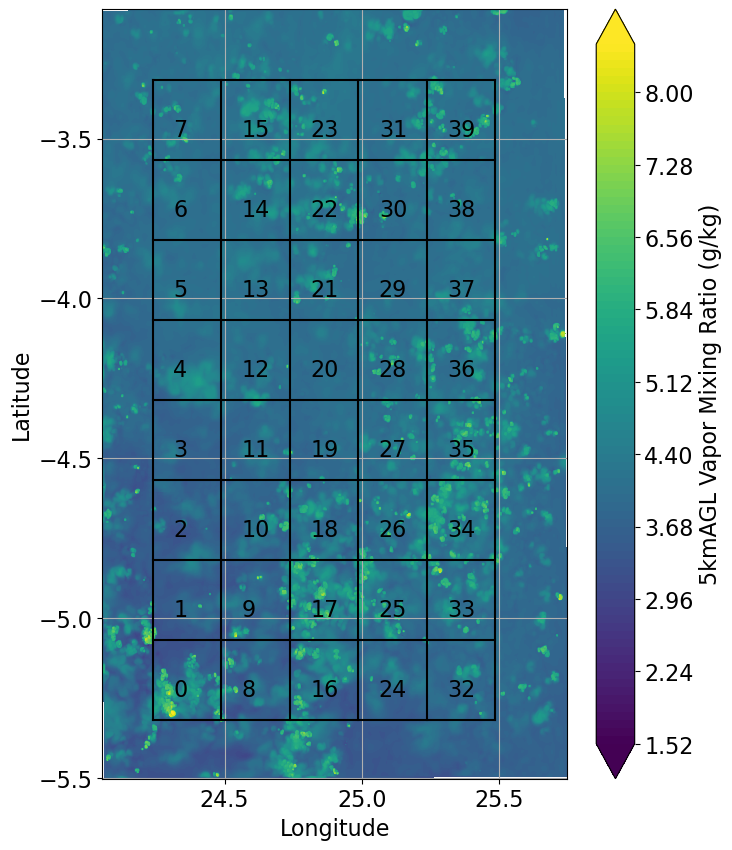

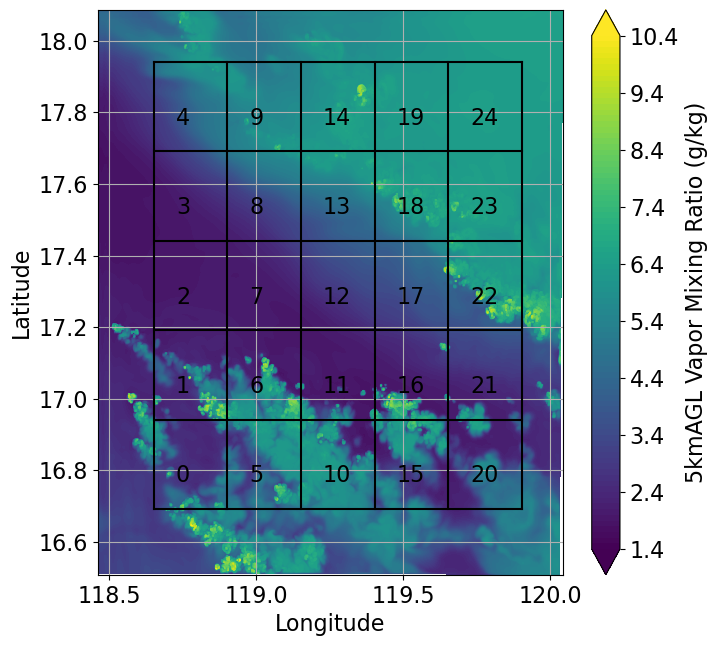

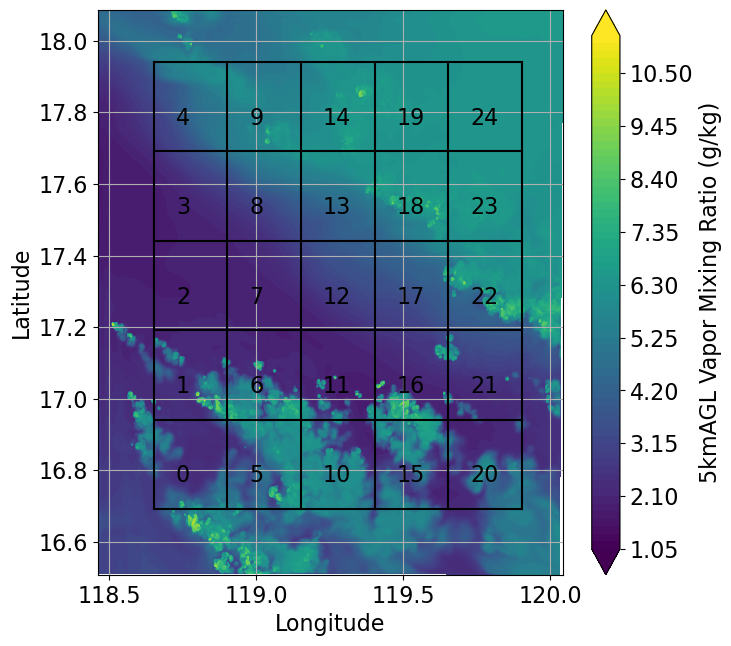

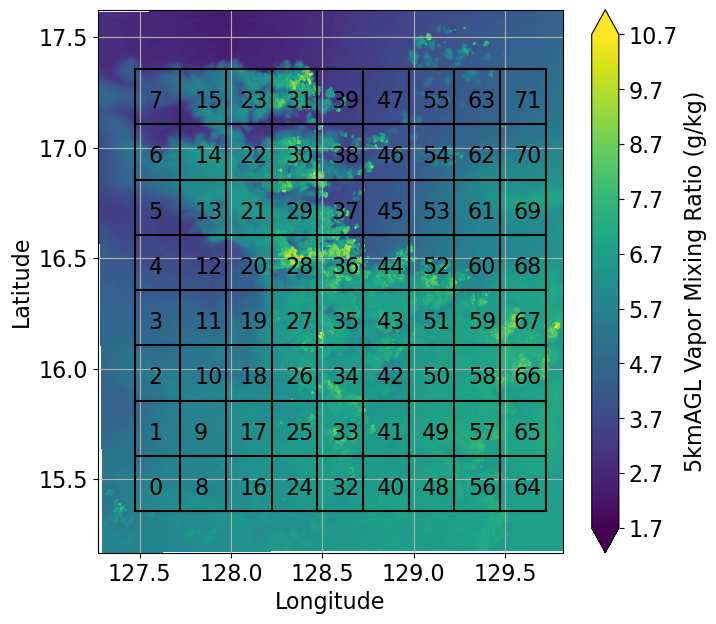

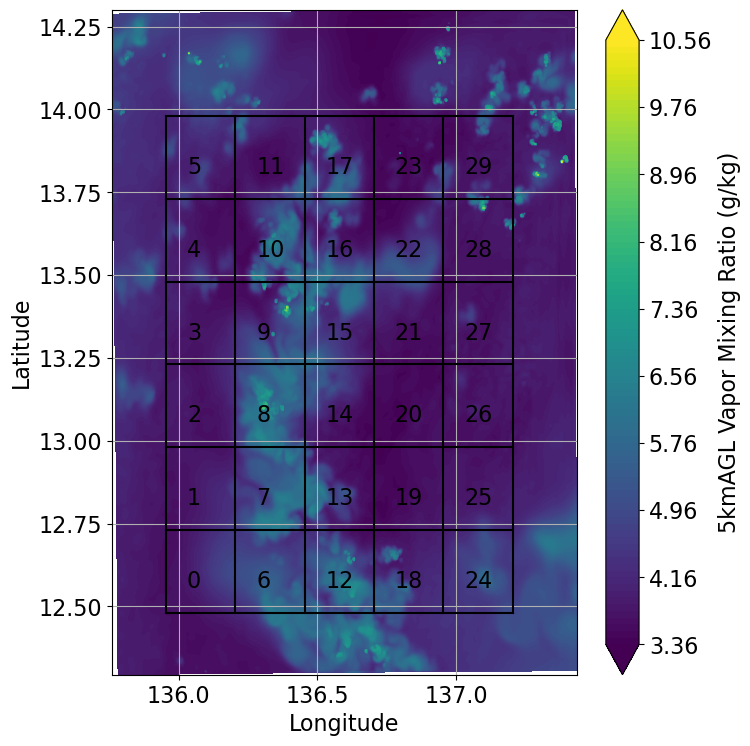

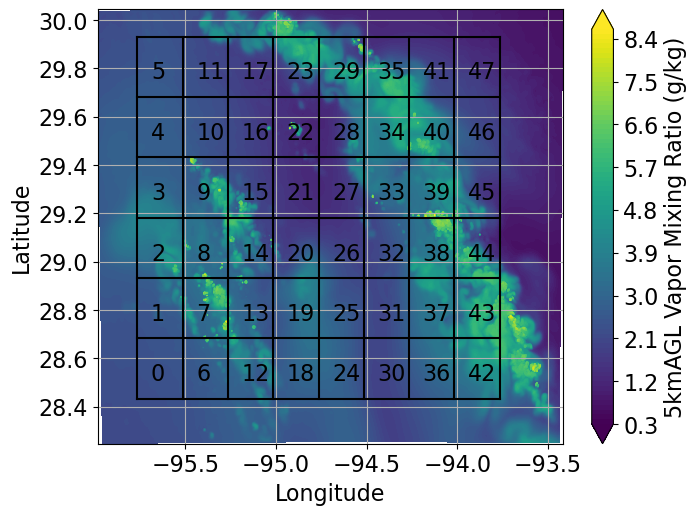

In [4]:
plt.rcParams.update({'font.size': 16})

# Create maps of ERA5 decomposition for saving

# Loop through cases
for c in np.arange(0,len(cases)):
    cn = cases[c]
    print(cn)
    prof[cn] = OrderedDict()
    profs[cn] = OrderedDict()
    # get all lite files
    files = sorted(glob.glob('/monsoon/LES_MODEL_DATA/'+cn+'/G3/out_30s/a-A*g3.h5'))

    filein = files[0] # Choose first lite file

    # Calculate lat /lon bounds
    lon_avg,lat_avg,lon_arr,lat_arr,lon0,lat0,lon1,lat1,nx,ny = grid_decomp(filein,ex_pts,gs_reanal)

    # Variable for plotting
    rams_file = h5py.File(filein, 'r')

    # Grab lat lon variables from case initial file
    lat = np.array(rams_file['GLAT'])
    lon = np.array(rams_file['GLON'])
    dom_rat = np.shape(lon)[0]/np.shape(lon)[1]
    
    plt_var = rams_file['RV'][51,:,:]*1000 # Plot variable

    rams_file.close() # Close file
    
    w_lvls = 100 # Specify number of contour levels for plotting
    # Make Plot
    fig,ax = plt.subplots(1,1,figsize=[7.5,7*dom_rat])
    a = ax.contourf(lon,lat,plt_var,levels=w_lvls,cmap=plt.cm.viridis,extend='both')
    for lo in np.arange(0,len(lon_arr)):
        plt.plot([lon_arr[lo],lon_arr[lo]],[np.min(lat_arr),np.max(lat_arr)],'-k')

    for la in np.arange(0,len(lat_arr)):
        plt.plot([np.min(lon_arr),np.max(lon_arr)],[lat_arr[la],lat_arr[la]],'-k')

    # Number reanalysis sized boxes
    cntp = 0    
    # loop through lat and lon regions (add labels)
    for lo in np.arange(0,len(lon_arr)-1):
        for la in np.arange(0,len(lat_arr)-1):

            lon_id0 = np.where(np.abs(lon_avg-lon_arr[lo]) == np.min(np.abs(lon_avg-lon_arr[lo])))[0][0]
            lon_id1 = np.where(np.abs(lon_avg-lon_arr[lo+1]) == np.min(np.abs(lon_avg-lon_arr[lo+1])))[0][0]
            lat_id0 = np.where(np.abs(lat_avg-lat_arr[la]) == np.min(np.abs(lat_avg-lat_arr[la])))[0][0]
            lat_id1 = np.where(np.abs(lat_avg-lat_arr[la+1]) == np.min(np.abs(lat_avg-lat_arr[la+1])))[0][0]
            lon_plot = np.nanmean([lon_avg[lon_id0],lon_avg[lon_id1]])
            lat_plot = np.nanmean([lat_avg[lat_id0],lat_avg[lat_id1]])
            plt.text(lon_plot-0.05,lat_plot-0.05,str(cntp))
            cntp = cntp + 1

    plt.grid()
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    cbar = plt.colorbar(a,ax=ax)

    #cbar.ax.set_ylabel('Column Maximum Vertical Velocity (m/s)')
    cbar.ax.set_ylabel('5kmAGL Vapor Mixing Ratio (g/kg)')
    #cbar.ax.set_ylabel('Near Surface Potential Temperature (K)')
    #cbar.ax.set_ylabel('Near Surface Wind Speed (m/s)')

    savefile = savepathd+'G3_5KMRV_Domain_Decomp_0p25deg_'+cn+savename+'.pdf'
    fig.savefig(savefile)
    savefile = savepathd+'G3_5KMRV_Domain_Decomp_0p25deg_'+cn+savename+'.png'
    fig.savefig(savefile)



In [51]:
# Create profile variables for saving
prof = OrderedDict()
latlon = OrderedDict()
numg = OrderedDict()

profs = OrderedDict()
latlons_id = OrderedDict()
latlons = OrderedDict()
numgs = OrderedDict()

for c in np.arange(0,len(cases)):
    cn = cases[c]

    print(cn)
    prof[cn] = OrderedDict()
    profs[cn] = OrderedDict()
    # get all lit files
    files = sorted(glob.glob('/monsoon/LES_MODEL_DATA/'+cn+'/G3/out_30s/a-A*g3.h5'))

    # Grab initial file at the beginning of the analysis period   
    filein = files[0] # Choose first lite file
    gs_reanal = 0.25 # Degrees
    ex_pts = 100 # exlcude # grid points near edges
    ex_pts = 200 # exlcude # grid points near edges

    # Calculate lat /lon bounds
    lon_avg,lat_avg,lon_arr,lat_arr,lon0,lat0,lon1,lat1,nx,ny = grid_decomp(filein,ex_pts,gs_reanal)
    
    # Grab initial file at the beginning of the analysis period
    rams_file = h5py.File(filein, 'r')
    lat = rams_file['GLAT'][:]
    lon = rams_file['GLON'][:]

    # Variables to pull and grab profiles of
    varns = ['topt','UP','VP','RV','WP','THETA','temp','pres','RTC','SPD']
    
    #loop through variables
    for v in np.arange(0,len(varns)):
        print(varns[v])
        prof[cn][varns[v]] = OrderedDict()
        profs[cn][varns[v]] = OrderedDict()
        cntp = 0    
        # loop through lat and lon regions
        for lo in np.arange(0,len(lon_arr)-1):
            for la in np.arange(0,len(lat_arr)-1):
                
                # Find ids for each ERA5 subgrid
                lon_id0 = np.where(np.abs(lon_avg-lon_arr[lo]) == np.min(np.abs(lon_avg-lon_arr[lo])))[0][0]
                lon_id1 = np.where(np.abs(lon_avg-lon_arr[lo+1]) == np.min(np.abs(lon_avg-lon_arr[lo+1])))[0][0]
                lat_id0 = np.where(np.abs(lat_avg-lat_arr[la]) == np.min(np.abs(lat_avg-lat_arr[la])))[0][0]
                lat_id1 = np.where(np.abs(lat_avg-lat_arr[la+1]) == np.min(np.abs(lat_avg-lat_arr[la+1])))[0][0]

                #print(len(np.arange(lon_id0,lon_id1)))
                #print(len(np.arange(lat_id0,lat_id1)))
                #print(lon_id0,lon_id1)
                #print(lat_id0,lat_id1)
                    
                if varns[v] == 'temp':
                    cp = 1004; # J/kg/K
                    temp_arr = rams_file['THETA'][:,lat_id0:lat_id1,lon_id0:lon_id1] * (rams_file['PI'][:,lat_id0:lat_id1,lon_id0:lon_id1] / cp)
                    avg_prof = np.nanmean(temp_arr,axis=(1,2))
                elif varns[v] == 'pres':
                    cp = 1004; # J/kg/K
                    rd = 287; # J/kg/K
                    p00 = 100000; # Reference Pressure
                    temp_arr = p00 * np.power( (rams_file['PI'][:,lat_id0:lat_id1,lon_id0:lon_id1] / cp), cp/rd)
                    avg_prof = np.nanmean(temp_arr,axis=(1,2))
                elif varns[v] == 'RTC':
                    temp_arr = rams_file['RTP'][:,lat_id0:lat_id1,lon_id0:lon_id1] - rams_file['RV'][:,lat_id0:lat_id1,lon_id0:lon_id1]
                    avg_prof = np.nanmean(temp_arr,axis=(1,2))
                elif varns[v] == 'SPD':
                    temp_arr = np.sqrt(np.power(rams_file['UP'][:,lat_id0:lat_id1,lon_id0:lon_id1],2.0) + np.power(rams_file['VP'][:,lat_id0:lat_id1,lon_id0:lon_id1],2.0))
                    avg_prof = np.nanmean(temp_arr,axis=(1,2))
                elif varns[v] == 'topt':
                    temp_arr = rams_file['TOPT'][lat_id0:lat_id1,lon_id0:lon_id1]
                    avg_prof = np.nanmean(temp_arr)
                else:
                    temp_arr = rams_file[varns[v]][:,lat_id0:lat_id1,lon_id0:lon_id1]
                    avg_prof = np.nanmean(temp_arr,axis=(1,2))

                # Save mean profile for variable within ERA5-sized domains
                prof[cn][varns[v]][cntp] = copy.deepcopy(avg_prof)

                # Create storage array for sub-ERA5 domains               
                profs[cn][varns[v]][cntp] = OrderedDict()
                # Only need to grab the lat lon bounds for one of the variables
                if v == 0:
                    latlon[cn,cntp] = copy.deepcopy(np.array([lon_id0,lon_id1,lat_id0,lat_id1]))
                
                # Sub ERA5-domains
                sub_era5 = [0.1,0.05,0.025,0.01]
                sub_era5 = [2,5,10,16,25]
                sub_era5 = [3,4,5,9,27] # 9km, 7km, 5km, 3km, 1km 
                for s in np.arange(0,len(sub_era5)):
                    
                    profs[cn][varns[v]][cntp][sub_era5[s]] = OrderedDict()

                    # Calculate lat lon bounds for subdomains
                    lat_avgs = np.nanmean(lat[lat_id0:lat_id1,lon_id0:lon_id1],axis=1)
                    lon_avgs = np.nanmean(lon[lat_id0:lat_id1,lon_id0:lon_id1],axis=0)
                    #print(lat_avgs)
                    #print(lon_avgs)

                    # Get lat lon bounds from new subdomain
                    lat0s = np.nanmin(lat_avgs)
                    lat1s = np.nanmax(lat_avgs)
                    lon0s = np.nanmin(lon_avgs)
                    lon1s = np.nanmax(lon_avgs)                   
                    
                    # Calculate lat lon bound arrays
                    dd = sub_era5[s]
                    lon_arr_s = np.arange(lon0s,lon1s+0.001,(lon1s-lon0s)/dd)
                    lat_arr_s = np.arange(lat0s,lat1s+0.001,(lat1s-lat0s)/dd)
                    
                    #print(len(lon_arr_s)-1,len(lat_arr_s)-1)
                    
                    cntps = 0                    
                    # loop through lat and lon regions
                    for los in np.arange(0,len(lon_arr_s)-1):
                        for las in np.arange(0,len(lat_arr_s)-1):

                            # Find ids for each ERA5 subgrid
                            lon_id0s = np.where(np.abs(lon_avgs-lon_arr_s[los]) == np.min(np.abs(lon_avgs-lon_arr_s[los])))[0][0]
                            lon_id1s = np.where(np.abs(lon_avgs-lon_arr_s[los+1]) == np.min(np.abs(lon_avgs-lon_arr_s[los+1])))[0][0]
                            lat_id0s = np.where(np.abs(lat_avgs-lat_arr_s[las]) == np.min(np.abs(lat_avgs-lat_arr_s[las])))[0][0]
                            lat_id1s = np.where(np.abs(lat_avgs-lat_arr_s[las+1]) == np.min(np.abs(lat_avgs-lat_arr_s[las+1])))[0][0]

                            #print(len(np.arange(lon_id0s,lon_id1s)))
                            #print(len(np.arange(lat_id0s,lat_id1s)))
                            #print(lon_id0s,lon_id1s)
                            #print(lat_id0s,lat_id1s)
                           
                            lat_idn = np.arange(lat_id0+lat_id0s,lat_id0+lat_id1s)
                            lon_idn = np.arange(lon_id0+lon_id0s,lon_id0+lon_id1s)
                                                        
                            if varns[v] == 'temp':
                                cp = 1004; # J/kg/K
                                temp_arr = rams_file['THETA'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s] * (rams_file['PI'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s] / cp)
                                avg_prof = np.nanmean(temp_arr,axis=(1,2))
                            elif varns[v] == 'pres':
                                cp = 1004; # J/kg/K
                                rd = 287; # J/kg/K
                                p00 = 100000; # Reference Pressure
                                temp_arr = p00 * np.power( (rams_file['PI'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s] / cp), cp/rd)
                                avg_prof = np.nanmean(temp_arr,axis=(1,2))
                            elif varns[v] == 'RTC':
                                temp_arr = rams_file['RTP'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s] - rams_file['RV'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s]
                                avg_prof = np.nanmean(temp_arr,axis=(1,2))
                            elif varns[v] == 'SPD':
                                temp_arr = np.sqrt(np.power(rams_file['UP'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s],2.0) + np.power(rams_file['VP'][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s],2.0))
                                avg_prof = np.nanmean(temp_arr,axis=(1,2))
                            elif varns[v] == 'topt':
                                temp_arr = rams_file['TOPT'][lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s]
                                avg_prof = np.nanmean(temp_arr)
                            else:
                                temp_arr = rams_file[varns[v]][:,lat_id0+lat_id0s:lat_id0+lat_id1s,lon_id0+lon_id0s:lon_id0+lon_id1s]
                                avg_prof = np.nanmean(temp_arr,axis=(1,2))
                            
#                            profs[cntp,cntps] = copy.deepcopy(var_prof)
#                            profs[cn][varns[v]][sub_era5[s]][cntp,cntps] =  
                            profs[cn][varns[v]][cntp][sub_era5[s]][cntps] = copy.deepcopy(avg_prof)                            
                            #print('profs',cn,dd,varns[v],cntp,cntps)
                            # Only need to grab the lat lon bounds for one of the variables
                            if v == 0:
                                latlons_id[cn,dd,cntp,cntps] = copy.deepcopy(np.array([np.min(lon_idn),np.max(lon_idn),np.min(lat_idn),np.max(lat_idn)]))
                                latlons[cn,dd,cntp,cntps] = copy.deepcopy(np.array([lon_avg[np.min(lon_idn)],lon_avg[np.max(lon_idn)],lat_avg[np.min(lat_idn)],lat_avg[np.max(lat_idn)]]))
                            cntps = cntps + 1
                    #print(s,dd,cntps)
                    numgs[cn,cntp,s] = cntps
                print(cntp)
                cntp = cntp + 1
        numg[cn] = cntp
 
    rams_file.close()     
    
    savefile = savepathp+'Sim_Profs_range_'+savename+'_'+cn+'.p'
    with open(savefile, 'wb') as file:
        # A new file will be created
        pickle.dump([prof,latlon,numg,profs,latlons,latlons_id,numgs], file)

RSA1.1-R
topt
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
UP
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
VP
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
RV
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
WP
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
6

In [ ]:
#### EXTRA PLOTTING BELOW 

Text(0, 0.5, 'Near Surface Wind Speed (m/s)')

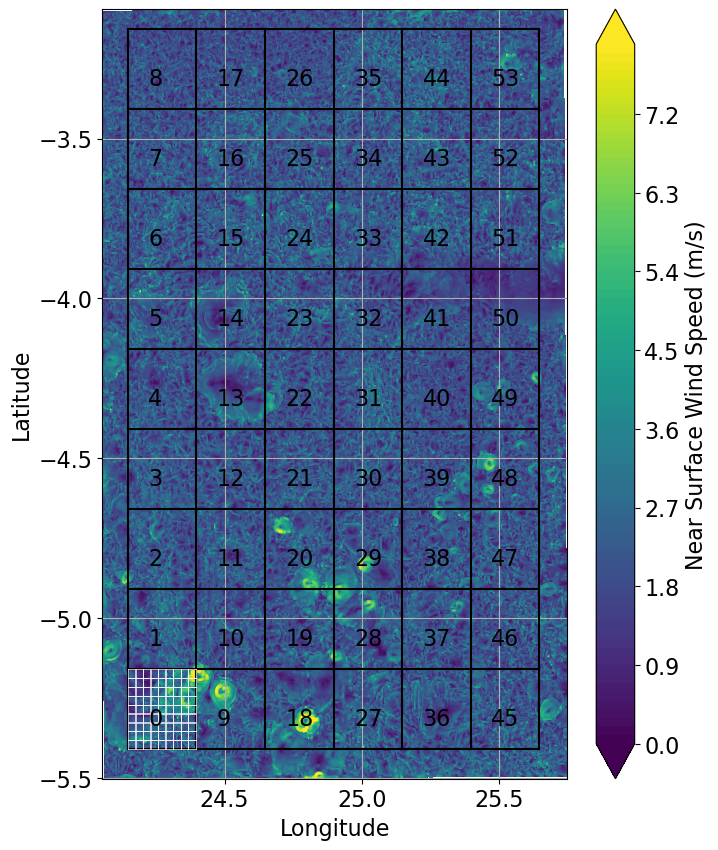

In [54]:
# Create methods plot for manuscript to show smaller 3km boxes within an era5 box

# Change font size
plt.rcParams.update({'font.size': 16})

# Choose simulation name
cn = 'DRC1.1-R'

# Pull profiles from simulation domain
infilename = '/monsoon/pmarin/ENV/Sim_Profs_range_all_'+cn+'.p'
with open(infilename, 'rb') as f:
    [profd,latlon,numg,profds,latlons,latlons_id,numgs] = pickle.load(f)    

# get all simulation lite files
files = sorted(glob.glob('/monsoon/LES_MODEL_DATA/'+cn+'/G3/out_30s/a-A*g3.h5'))

# Grab initial file at the beginning of the analysis period
filein = files[0]
ex_pts = 100 # Points to exclude near grid boundaries
gs_reanal = 0.25 # Deg.

# Calculate lat /lon bounds for reanalysis sized boxes
lon_avg,lat_avg,lon_arr,lat_arr,lon0,lat0,lon1,lat1,nx,ny = grid_decomp(filein,ex_pts,gs_reanal)
dom_rat = ny/nx

# Read in RAMS file 
rams_file = h5py.File(filein, 'r')

w_lvls = np.arange(0,8.01,0.1) # Specify contour levels
# Calculate surface wind speed from u and v components
lat = rams_file['GLAT'][:]
lon = rams_file['GLON'][:]
plt_var = np.sqrt(np.power(rams_file['UP'][1,:,:],2.0)+np.power(rams_file['VP'][1,:,:],2.0))

#  Make Figure
fig,ax = plt.subplots(1,1,figsize=[7.5,7*dom_rat])

# Plot wind speeds on figure
a = ax.contourf(lon,lat,plt_var,levels=w_lvls,cmap=plt.cm.viridis,extend='both')

# Plot Reanalysis-Sized boxes
for lo in np.arange(0,len(lon_arr)):
    plt.plot([lon_arr[lo],lon_arr[lo]],[np.min(lat_arr),np.max(lat_arr)],'-k')
for la in np.arange(0,len(lat_arr)):
    plt.plot([np.min(lon_arr),np.max(lon_arr)],[lat_arr[la],lat_arr[la]],'-k')

# Number reanalysis sized boxes
cntp = 0    
# loop through lat and lon regions
for lo in np.arange(0,len(lon_arr)-1):
    for la in np.arange(0,len(lat_arr)-1):
        lon_id0 = np.where(np.abs(lon_avg-lon_arr[lo]) == np.min(np.abs(lon_avg-lon_arr[lo])))[0][0]
        lon_id1 = np.where(np.abs(lon_avg-lon_arr[lo+1]) == np.min(np.abs(lon_avg-lon_arr[lo+1])))[0][0]
        lat_id0 = np.where(np.abs(lat_avg-lat_arr[la]) == np.min(np.abs(lat_avg-lat_arr[la])))[0][0]
        lat_id1 = np.where(np.abs(lat_avg-lat_arr[la+1]) == np.min(np.abs(lat_avg-lat_arr[la+1])))[0][0]
        lon_plot = np.nanmean([lon_avg[lon_id0],lon_avg[lon_id1]])
        lat_plot = np.nanmean([lat_avg[lat_id0],lat_avg[lat_id1]])
        plt.text(lon_plot-0.05,lat_plot-0.05,str(cntp))
        cntp = cntp + 1

box_id = 9
# Plot 3km boxes within reanalysis boxes for one chosen box
for i in np.arange(0,81):
    llp = latlons[cn,box_id,0,i]
    plt.plot([llp[0],llp[0]],[llp[2],llp[3]],'-w',lw=0.5)
    plt.plot([llp[1],llp[1]],[llp[2],llp[3]],'-w',lw=0.5)
    plt.plot([llp[0],llp[1]],[llp[2],llp[2]],'-w',lw=0.5)
    plt.plot([llp[0],llp[1]],[llp[3],llp[3]],'-w',lw=0.5)
    llp = latlons_id[cn,9,7,i]
        
plt.grid()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cbar = plt.colorbar(a,ax=ax)

cbar.ax.set_ylabel('Near Surface Wind Speed (m/s)')
# Save Figure
#savefile = savepath+'G3_5KMRV_Domain_Decomp_0p25deg_'+cn+'.pdf'
#fig.savefig(savefile)
#savefile = savepath+'G3_5KMRV_Domain_Decomp_0p25deg_'+cn+'.png'
#fig.savefig(savefile)


In [ ]:
for i in np.arange(0,len(files)):
    print(i,std_var[i],bar_colors[i])

In [ ]:
cases = ['RSA1.1-R','ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R']

In [ ]:
#subbox = np.array([3,5,9,27])
cases = ['RSA1.1-R','ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R']
subbox = np.array([3,4,5,9,27])

varins = 'rv_500s'
min_val = np.zeros((len(cases),len(subbox)))
max_val = np.zeros((len(cases),len(subbox)))
for c in np.arange(0,len(cases)):
    cn = cases[c]
    savepath = '/monsoon/pmarin/ENV/'+cn+'/'
    files = sorted(glob.glob(savepath+'*SubERA5*.p'))
    
    for s in np.arange(0,len(subbox)):
        min_data = 100000
        max_data = 0
        for i in np.arange(0,len(files)):
            SEinfilename = savepath+cn+'_Environments_SubERA5_'+str(i)+'.p'
            with open(SEinfilename, 'rb') as f:
                evars = pickle.load(f) # Load environmental variable dictionary
                var_all = evars[varins]            
                varn = var_all[cn,s]
                min_temp = np.nanmin(varn)
                max_temp = np.nanmax(varn)
                if min_temp < min_data:
                    min_data = min_temp

                if max_temp > max_data:
                    max_data = max_temp

        min_val[c,s] = min_data
        max_val[c,s] = max_data
min_val_2d = np.nanmin(min_val,axis=0)
max_val_2d = np.nanmax(max_val,axis=0)

In [ ]:
plotpath = '/monsoon/pmarin/ENV/Doms/'
# Create profile variables for saving
plt.rcParams.update({'font.size': 16})

# Loop through cases
for c in np.arange(0,len(cases)):

    #for cn in ['PHI1.1-R']:
    cn = cases[c]
    print(cn)  
    
    #get all lite files
    files = sorted(glob.glob('/monsoon/LES_MODEL_DATA/'+cn+'/G3/out_30s/a-A*g3.h5'))

    filein = files[0] # Choose first lite file
    gs_reanal = 0.25 # Degrees
    stpt = 0 # Shift boxes

    # Calculate lat /lon bounds
    lon_avg,lat_avg,lon_arr,lat_arr = grid_decomp(filein,stpt,gs_reanal)

    savepath = '/monsoon/pmarin/ENV/'+cn+'/'
    files = sorted(glob.glob(savepath+'*SubERA5*.p'))
    Einfilename = savepath+cn+'_Environments_ERA5.p'
    with open(Einfilename, 'rb') as f:
        evar = pickle.load(f) # Load environmental variable dictionary
        var_E5 = evar['rv_500s']

    std_var = np.zeros(len(files))
    stdmma_var = np.zeros(len(files))
    for i in np.arange(0,len(files)):
        SEinfilename = savepath+cn+'_Environments_SubERA5_'+str(i)+'.p'
        with open(SEinfilename, 'rb') as f:
            evars = pickle.load(f) # Load environmental variable dictionary
            var_all = evars['rv_500s']            

            for s in np.arange(3,4):
                varn = var_all[cn,s]
                varn = np.abs(varn)
                std_var[i] = np.nanstd(varn)
                varn_mma = (varn-min_val_2d[s])/(max_val_2d[s]-min_val_2d[s])
                stdmma_var[i] = np.nanstd(varn_mma)
                print(i,stdmma_var[i])

    # Create line scaling array
    cvals = np.zeros(len(stdmma_var))
    for c in np.arange(0,len(stdmma_var)):
        cvals[c] = (stdmma_var[c]-0.0)/(0.20-0.0)
        if cvals[c] > 1.0:
            cvals[c] = 1.0
            
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","thistle","plum", "violet","magenta"])
    bar_colors = [cmap(c) for c in cvals]    
    
    
    # Variable for plotting
    rams_file = h5py.File(filein, 'r')

    
    cp = 1004; # J/kg/K
    rd = 287; # J/kg/K
    p00 = 100000; # Reference Pressure
    temp_arr = p00 * np.power( (rams_file['PI'][:] / cp), cp/rd)
    avg_prof = np.nanmean(temp_arr,axis=(1,2))
    print(avg_prof)
    id500 = np.where(np.abs(avg_prof-50000)==np.min(np.abs(avg_prof-50000)))[0][0]
    
    plt_var = rams_file['RV'][id500,:,:]*1000 
    lat = rams_file['GLAT'][:]
    lon = rams_file['GLON'][:]
    rams_file.close()
    dom_rat = np.shape(lon)[0]/np.shape(lon)[1]
    
    # Make Plot
    w_lvls = 100
    fig,ax = plt.subplots(1,1,figsize=[7.5,7*dom_rat])
    a = ax.contourf(lon,lat,plt_var,levels=w_lvls,cmap=plt.cm.viridis,extend='both')

    dd = 0.01
    cntp = 0    
    # loop through lat and lon regions
    for lo in np.arange(0,len(lon_arr)-1):
        for la in np.arange(0,len(lat_arr)-1):

            
            plt.plot([lon_arr[lo],lon_arr[lo]],[lat_arr[la],lat_arr[la+1]],'-',c=bar_colors[cntp])
            plt.plot([lon_arr[lo],lon_arr[lo+1]],[lat_arr[la],lat_arr[la]],'-',c=bar_colors[cntp])
            plt.plot([lon_arr[lo+1]-dd,lon_arr[lo+1]-dd],[lat_arr[la],lat_arr[la+1]],'-',c=bar_colors[cntp])
            plt.plot([lon_arr[lo],lon_arr[lo+1]],[lat_arr[la+1]-dd,lat_arr[la+1]-dd],'-',c=bar_colors[cntp])

            lon_id0 = np.where(np.abs(lon_avg-lon_arr[lo]) == np.min(np.abs(lon_avg-lon_arr[lo])))[0][0]
            lon_id1 = np.where(np.abs(lon_avg-lon_arr[lo+1]) == np.min(np.abs(lon_avg-lon_arr[lo+1])))[0][0]
            lat_id0 = np.where(np.abs(lat_avg-lat_arr[la]) == np.min(np.abs(lat_avg-lat_arr[la])))[0][0]
            lat_id1 = np.where(np.abs(lat_avg-lat_arr[la+1]) == np.min(np.abs(lat_avg-lat_arr[la+1])))[0][0]
            lon_plot = np.nanmean([lon_avg[lon_id0],lon_avg[lon_id1]])
            lat_plot = np.nanmean([lat_avg[lat_id0],lat_avg[lat_id1]])
            plt.text(lon_plot-0.05,lat_plot-0.05,str(cntp))
            cntp = cntp + 1

    plt.grid()
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    cbar = plt.colorbar(a,ax=ax)

    #cbar.ax.set_ylabel('Column Maximum Vertical Velocity (m/s)')
    cbar.ax.set_ylabel('5kmAGL Vapor Mixing Ratio (g/kg)')
    #cbar.ax.set_ylabel('Near Surface Potential Temperature (K)')
    #cbar.ax.set_ylabel('Near Surface Wind Speed (m/s)')

    savefile = plotpath+'G3_5KMRV_Domain_Decomp_0p25deg_'+cn+'_wstddevmma.pdf'
    fig.savefig(savefile)
    savefile = plotpath+'G3_5KMRV_Domain_Decomp_0p25deg_'+cn+'_wstddevmma.png'
    fig.savefig(savefile)

